# Boston Police Earnings

In [195]:
# Import required Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

### Read the data

In [121]:
# I came across an encoding error while trying to read the csv.
# This is where I found the encoding for my computer on stack overflow. It was in one of the comments (https://stackoverflow.com/questions/30462807/encoding-error-in-panda-read-csv)
earnings = pd.read_csv('Siemens_ Assignment/employee-earnings-report-2016.csv', encoding='iso-8859-1')
earnings.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Abadi,Kidani A",Assessing Department,Property Officer,"$46,291.98",NaN,$300.00,NaN,NaN,NaN,NaN,"$46,591.98",02118
1,"Abasciano,Joseph",Boston Police Department,Police Officer,"$6,933.66",NaN,$850.00,$205.92,"$74,331.86",NaN,"$15,258.44","$97,579.88",02132
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,"$103,442.22",NaN,$550.00,"$15,884.53",NaN,"$4,746.50",NaN,"$124,623.25",02132
3,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),"$18,249.83",NaN,NaN,NaN,NaN,NaN,NaN,"$18,249.83",02148
4,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,"$84,410.28",NaN,"$1,250.00",NaN,NaN,NaN,NaN,"$85,660.28",02481


In [122]:
# Chck the nulls and the data type
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22046 entries, 0 to 22045
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NAME                       22046 non-null  object
 1   DEPARTMENT_NAME            22046 non-null  object
 2   TITLE                      22046 non-null  object
 3   REGULAR                    21463 non-null  object
 4   RETRO                      416 non-null    object
 5   OTHER                      12845 non-null  object
 6   OVERTIME                   6690 non-null   object
 7   INJURED                    1378 non-null   object
 8   DETAIL                     2425 non-null   object
 9   QUINN/EDUCATION INCENTIVE  1290 non-null   object
 10  TOTAL EARNINGS             22046 non-null  object
 11  POSTAL                     22045 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [123]:
print(f'We have {earnings.shape[0]} rows and {earnings.shape[1]} columns for data')

We have 22046 rows and 12 columns for data


### things to note:

The data types seem to all be objects. There appears to be a '$' sign infront of every currency related data. There is also a ',' for nmbers over a thousand. There appears to be also a lot of null values for the `Retro` , `Other`, `Overtime`, `Injured`, `Detail`, and `Quinn/Education Incentive`.

In [124]:
# check for duplicated rows
earnings.duplicated().sum()

0

In [125]:
# Check duplicated columns 
earnings.T.duplicated()

NAME                         False
DEPARTMENT_NAME              False
TITLE                        False
REGULAR                      False
RETRO                        False
OTHER                        False
OVERTIME                     False
INJURED                      False
DETAIL                       False
QUINN/EDUCATION INCENTIVE    False
TOTAL EARNINGS               False
POSTAL                       False
dtype: bool

We need to drop some of the columns before we do any more cleaning steps. This is because the question at hand is to verify the earnings of the top police detectives and if it consistent with the article given.

The columns we should keep are: `NAME`, `DEPARTMENT_NAME`, `TITLE`, `TOTAL EARNINGS`

In [126]:
earnings = earnings[['NAME', 'DEPARTMENT_NAME','TITLE', 'TOTAL EARNINGS']]
earnings.head()

,NAME,DEPARTMENT_NAME,TITLE,TOTAL EARNINGS
0,"Abadi,Kidani A",Assessing Department,Property Officer,"$46,591.98"
1,"Abasciano,Joseph",Boston Police Department,Police Officer,"$97,579.88"
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,"$124,623.25"
3,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),"$18,249.83"
4,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,"$85,660.28"


In [127]:
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22046 entries, 0 to 22045
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             22046 non-null  object
 1   DEPARTMENT_NAME  22046 non-null  object
 2   TITLE            22046 non-null  object
 3   TOTAL EARNINGS   22046 non-null  object
dtypes: object(4)
memory usage: 689.1+ KB


In [128]:
# Great there is no null values for the dataframe now.

In [129]:
earnings.sort_values(by=['TOTAL EARNINGS'])

,NAME,DEPARTMENT_NAME,TITLE,TOTAL EARNINGS
11146,"Lally,Bernadette",Boston City Council,Secretary,"$1,000.00"
7104,"Fowlkes,Lorraine E.",Boston City Council,Secretary,"$1,000.00"
15058,"Nolan,Andrew",Parks Department,Summer Program Assistant,"$1,000.00"
21349,"White-Pilet,Yoni A",BPS Substitute Teachers/Nurs,Substitute Teacher,"$1,006.53"
5915,"Dunn,Lori D",BPS East Boston High,Teacher,"$1,010.05"
...,...,...,...,...
13303,"McGrath,Caitlin",BPS Substitute Teachers/Nurs,Substitute Teacher,$990.61
1869,"Bradshaw,John E.",BPS Substitute Teachers/Nurs,Substitute Teacher HE,$990.62
21380,"Wiggins,Lucas A",BPS Substitute Teachers/Nurs,Substitute Teacher,$990.63
15036,"Nixon,Chloe",BPS Substitute Teachers/Nurs,Substitute Teacher,$990.64


In [130]:
# this does not make sense because the the values are not in the right format. I did this to show yhay we need to take out 
# the '$' and the ',' and convert it to a integer data type.

In [131]:
# replace the '$' with nothing for all the values in the Total Earnings column.
#repeat the process for the comma by adding it on at the end.
earnings['TOTAL EARNINGS'] = earnings['TOTAL EARNINGS'].str.replace('$', '').str.replace(',','')

In [132]:
# check to see if it worked.
earnings.head(10)

,NAME,DEPARTMENT_NAME,TITLE,TOTAL EARNINGS
0,"Abadi,Kidani A",Assessing Department,Property Officer,46591.98
1,"Abasciano,Joseph",Boston Police Department,Police Officer,97579.88
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,124623.25
3,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),18249.83
4,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,85660.28
5,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,50337.63
6,"Abbott,Erin Elizabeth",Hurley K-8,Teacher,80413.68
7,"Abbott,John R.",BPS Snowden International Hi,Teacher,99920.14
8,"Abbruzzese,Angela",BPS Clap Elementary,Lunch Hour Monitors,5000.90
9,"Abbruzzese,Donna",BPS Clap Elementary,Lunch Hour Monitors,621.90


In [133]:
# convert the datatype to numeric because it is still an object.
earnings['TOTAL EARNINGS']= earnings['TOTAL EARNINGS'].astype('float')

In [134]:
earnings.dtypes

NAME                object
DEPARTMENT_NAME     object
TITLE               object
TOTAL EARNINGS     float64
dtype: object

Now we need to see the top earnings of the police detectives

In [135]:
# set ascending to false because we want it to go from top earnings to bottom.
earnings=earnings.sort_values('TOTAL EARNINGS', ascending = False)
earnings.head(10)

,NAME,DEPARTMENT_NAME,TITLE,TOTAL EARNINGS
11489,"Lee,Waiman",Boston Police Department,Police Detective,403408.61
10327,"Josey,Windell C.",Boston Police Department,Police Detective,396348.50
15716,"Painten,Paul A",Boston Police Department,Police Detective,373959.35
2113,"Brown,Gregory",Boston Police Department,Police Detective,351825.50
9446,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,346105.17
10803,"Kervin,Timothy M.",Boston Police Department,Police Lieutenant/Hdq Dispatch,343818.16
17814,"Ruiz,Melvin",Boston Police Department,Police Detective,339367.10
7407,"Gambon,Andrew J",Boston Police Department,Police Detective,323485.97
8930,"Heath,Roque D",Boston Police Department,Police Detective,317703.38
4761,"Danilecki,John H",Boston Police Department,Police Captain,315750.29


In [138]:
# the index is wrong now so we need to change that 
earnings.reset_index(drop=True, inplace=True)

# Top 20 police earnings

In [139]:
earnings.head(20)

,NAME,DEPARTMENT_NAME,TITLE,TOTAL EARNINGS
0,"Lee,Waiman",Boston Police Department,Police Detective,403408.61
1,"Josey,Windell C.",Boston Police Department,Police Detective,396348.50
2,"Painten,Paul A",Boston Police Department,Police Detective,373959.35
3,"Brown,Gregory",Boston Police Department,Police Detective,351825.50
4,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,346105.17
5,"Kervin,Timothy M.",Boston Police Department,Police Lieutenant/Hdq Dispatch,343818.16
6,"Ruiz,Melvin",Boston Police Department,Police Detective,339367.10
7,"Gambon,Andrew J",Boston Police Department,Police Detective,323485.97
8,"Heath,Roque D",Boston Police Department,Police Detective,317703.38
9,"Danilecki,John H",Boston Police Department,Police Captain,315750.29


## CONCLUSION
We se that the top 10 earnings for boston public employees are all in the police department. According to the article (Police detective tops Boston's payroll with a total of over 403,000) 
by Meghan E. Irons, the top earner is Waiman Lee with 403,408.61 dollars which is consistent with the data. Most of them are detectives. The 2nd, 3rd, and 4th highest earners are also consistent with the article.

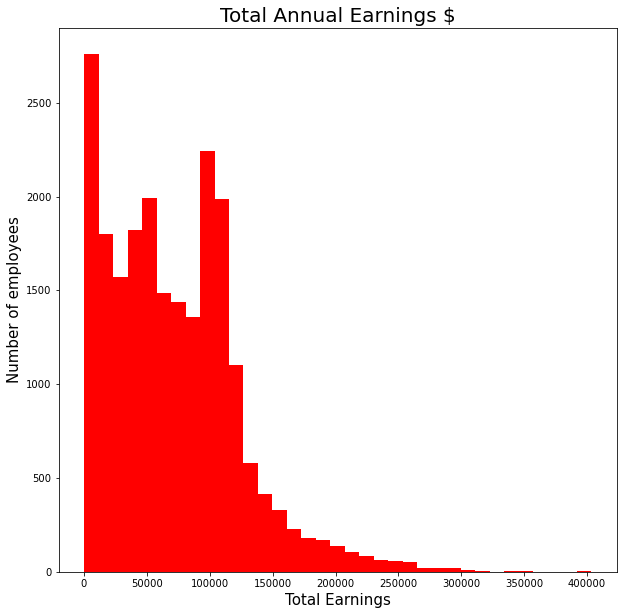

In [141]:
# Visuzalizing the distribution of all the employees
plt.figure(figsize=(10,10))
plt.hist(earnings['TOTAL EARNINGS'], bins=35, color='Red')
plt.xlabel('Total Earnings', fontsize=15)
plt.ylabel('Number of employees', fontsize=15)
plt.title('Total Annual Earnings $', fontsize = 20 )

plt.show()

This appears to be consistent with the graph on the front page of the article.

In [149]:
# Number of different departments
earnings['DEPARTMENT_NAME'].nunique()

228

Now that we have verified the top police detectives total earnings, lets check out some more anaylsis on the Boston Police Department 

In [184]:
# filtering to only employees that work for the Boston Police Department
police_earnings = earnings[earnings['DEPARTMENT_NAME'] == 'Boston Police Department']
police_earnings

,NAME,DEPARTMENT_NAME,TITLE,TOTAL EARNINGS
0,"Lee,Waiman",Boston Police Department,Police Detective,403408.61
1,"Josey,Windell C.",Boston Police Department,Police Detective,396348.50
2,"Painten,Paul A",Boston Police Department,Police Detective,373959.35
3,"Brown,Gregory",Boston Police Department,Police Detective,351825.50
4,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,346105.17
...,...,...,...,...
21841,"Noonan,Robert M",Boston Police Department,Police Officer,473.91
21868,"Perez,Javier E",Boston Police Department,Police Officer,376.25
21880,"Baily,Natasha M.",Boston Police Department,School Traffic Supv,328.93
21915,"Dietzel,Margaret",Boston Police Department,School Traffic Supv,274.10


In [190]:
# Lets take a look at the the number of employees for the Boston Police Department that make more 200,000 and less than 300,000 a year
police_200K = police_earnings[(police_earnings['TOTAL EARNINGS'] >= 200000) & (police_earnings['TOTAL EARNINGS'] <=300000)]
police_200K

,NAME,DEPARTMENT_NAME,TITLE,TOTAL EARNINGS
22,"Cummings,Joshua O",Boston Police Department,Police Detective,299420.84
23,"Connolly,Timothy",Boston Police Department,Police Captain/DDC,299413.31
24,"MacIsaac,Paul A",Boston Police Department,Police Detective,299349.97
25,"O'Rourke,Bernard P",Boston Police Department,Supn Bpd,299240.86
26,"Halstead,Randall J",Boston Police Department,Supn Bpd,299231.63
...,...,...,...,...
511,"Charbonnier,Albert F.",Boston Police Department,Police Detective,200827.45
512,"Cunniff,Christopher J",Boston Police Department,Police Sergeant (Det),200707.39
513,"Schroeder-Withington,Erin T",Boston Police Department,Police Detective,200639.52
514,"Lozano,Jose L",Boston Police Department,Police Sergeant (Det),200432.74


In [192]:
# Number of differnt titles
police_200K['TITLE'].nunique()

35

#### 444 employees from the Boston Police Department make between 200 and 300 thousand a year.

I want to look at how the different positions earnings are different. For that I am going to get rid of the employees that make less than 20,000 dollars a year to get a better idea of fulltime employees. Then Lets look at only the The police decetives

In [230]:

police_detectives = police_earnings[(police_earnings['TOTAL EARNINGS'] > 20000) & (police_earnings['TITLE']== 'Police Detective')]

police_detectives.reset_index(drop=True, inplace=True)
police_detectives.head(30)

,NAME,DEPARTMENT_NAME,TITLE,TOTAL EARNINGS
0,"Lee,Waiman",Boston Police Department,Police Detective,403408.61
1,"Josey,Windell C.",Boston Police Department,Police Detective,396348.50
2,"Painten,Paul A",Boston Police Department,Police Detective,373959.35
3,"Brown,Gregory",Boston Police Department,Police Detective,351825.50
4,"Ruiz,Melvin",Boston Police Department,Police Detective,339367.10
5,"Gambon,Andrew J",Boston Police Department,Police Detective,323485.97
6,"Heath,Roque D",Boston Police Department,Police Detective,317703.38
7,"Doogan,Kevin M",Boston Police Department,Police Detective,315421.24
8,"Williamson,Carlton A",Boston Police Department,Police Detective,312755.42
9,"Teixeira,John A.",Boston Police Department,Police Detective,312696.77


In [233]:
police_detectives.shape

(298, 4)

####  Now we have all 298 Police Detectives that make more than 20,000 dollars a year. This does not add up with the article in which it said that "In all, more than 500 dectives earned between 200,000 and 300,000, records show." There are not 500 detectives in total.  

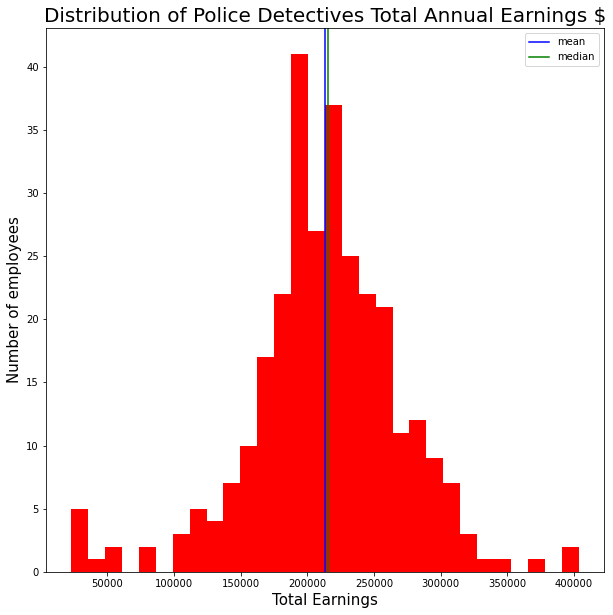

In [206]:
plt.figure(figsize=(10,10))
plt.hist(police_detectives['TOTAL EARNINGS'], bins=30, color='Red')
plt.xlabel('Total Earnings', fontsize=15)
plt.ylabel('Number of employees', fontsize=15)
plt.title('Distribution of Police Detectives Total Annual Earnings $', fontsize = 20 )
plt.axvline(police_detectives['TOTAL EARNINGS'].mean(), c='blue', label='mean')
plt.axvline(police_detectives['TOTAL EARNINGS'].median(), c='green', label='median')
plt.legend()
plt.show()

Some initial observations:

 - The average and median total earnings for all police detectives is a little over 200K (remember this only includes detectives that make over 20,000 dollars a year)
 - The distribution appears to be normal.

In [221]:
# Now lets look at how much detectives make compared to the other police department positions

In [212]:
# Get rid of some of the employee outliers 
police_earnings = police_earnings[police_earnings['TOTAL EARNINGS'] > 20000]

In [222]:
# group by title and sort the mean values 
avg_earnings = police_earnings.groupby('TITLE').mean().sort_values('TOTAL EARNINGS', ascending=False)
avg_earnings.rename(columns={'TOTAL EARNINGS' : 'AVG Earnings'}, inplace=True)
avg_earnings.reset_index(inplace=True)
avg_earnings.head(20)

,TITLE,AVG Earnings
0,Police Sergeant/Hdq Dispatcher,290398.540000
1,Supn-In Chief,285091.010000
2,Police Lieutenant/Hdq Dispatch,283031.333333
3,Police Lieut/Paid Detail Ser,279348.120000
4,Police Captain,267909.210000
5,Police Captain-DDC/HRCD,266890.600000
6,Supn Bpd,258748.486250
7,Dep Supn (Bpd),254927.868333
8,Police Lieut (Det),253332.240000
9,Police Captain/DDC,251699.349375


Detectives appear on number 15 on the list for average earnings by position. Detectives have the ability to make more than the rest of the police department but on average make less than other top positions. However, most of the top earners are detectives.

In [262]:
# Finding out the percentage of employees that make over 200,000 dollars a year that are detectives
police_df = police_earnings[(police_earnings['TOTAL EARNINGS'] >= 200000)]
x = police_df[police_df['TITLE'] == 'Police Detective']['TITLE'].count()
y = police_df['TITLE'].count()

In [263]:
print(f'{(x/y)*100}%')

38.412017167381975%


38% of the police department employees that make 200,000 dollars over are detectives

In [267]:
# Finding out the percentage of employees that make over 300,000 dollars a year that are detectives
police_df2 = police_earnings[(police_earnings['TOTAL EARNINGS'] >= 300000)]
x = police_df2[police_df2['TITLE'] == 'Police Detective']['TITLE'].count()
y = police_df2['TITLE'].count()

In [266]:
print(f'{(x/y)*100}%')

72.72727272727273%


72.7% of the police department employees that make over 300,000 dollars are detectives.